# 线性回归

## sklearn

In [82]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
    [35, 52, 60, 72, 85, 80, 95, 100, 105],
    [18, 25, 30, 38, 41, 44, 49, 52, 60]
])


(array([-3.37238874]), array([[0.56630336]]))

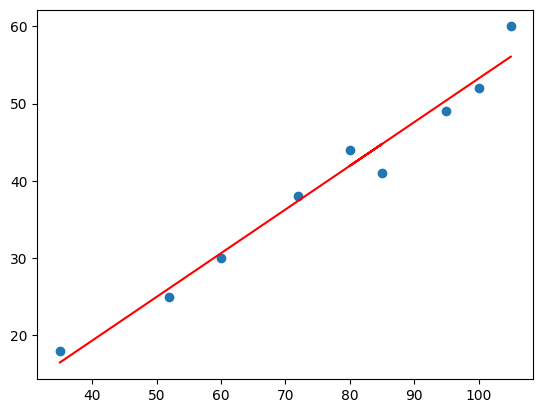

In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data[0, :].reshape(-1, 1)
y = data[1, :].reshape(-1, 1)
model.fit(X, y)

plt.scatter(X, y)

y_t = model.coef_ * X + model.intercept_

plt.plot(X, y_t, color='r')

model.intercept_, model.coef_

In [84]:
y_predict = model.predict([[100]])

y_predict

array([[53.25794732]])

## statsmodels

In [98]:
import statsmodels.api as sm

ols = sm.OLS(y, X)
model_ols = ols.fit()

model_ols.predict(1), model_ols.params

(array([0.52539547]), array([0.52539547]))

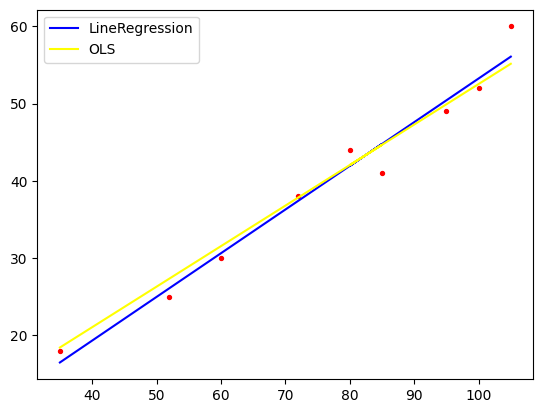

In [108]:

plt.scatter(X, y, marker='o', s=8, color='r')

y_t = model.coef_ * X + model.intercept_
y_t1 = model_ols.params * X

plt.plot(X, y_t, color='b', label='LineRegression')
plt.plot(X, y_t1, color='yellow', label='OLS')
plt.legend()

# 方差分析

In [110]:
from scipy.stats import f_oneway
import scipy.stats as stats
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

cityA = [10, 9, 9, 8, 8, 7, 7, 8, 8, 9]
cityB = [10, 8, 9, 8, 7, 7, 7, 8, 9, 9]
cityC = [9, 9, 8, 8, 8, 7, 6, 9, 8, 9]
#首先检查方差是否相等
(W, p) = stats.levene(cityA, cityB, cityC)
if p < 0.05: print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
#第1种方法:SciPy中的f_oneway()函数
F_statistic, pVal = stats.f_oneway(cityA, cityB, cityC)
print("单因素方差分析结果(f_oneway):F={0},and p={1}".format(F_statistic, pVal))
if pVal < 0.05: print('One of the groups is significantly different.')

单因素方差分析结果(f_oneway):F=0.10150375939849626,and p=0.9038208903685354
